In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def func5(path):
    frame = cv2.imread(path)
    frame = cv2.resize(frame,(100,100))
    frame = cv2.GaussianBlur(frame,(5,5),0)
    # downsize it to reduce processing time
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
    
    img = cv2.dilate(skinMask,kernel)

    img = cv2.erode(img,kernel)

    edges = cv2.Canny(img, 30, 70)  # canny边缘检测 

#    cv2.imshow('wsdwe',edges)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
    return edges  

In [15]:
def func(path):    
    frame = cv2.imread(path)
    frame = cv2.resize(frame,(100,100))
    # downsize it to reduce processing time
    #cv2.imshow("original",frame)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    #print(frame.shape)
    #tuned settings
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")

    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
#    cv2.imshow("masked",skinMask)
    
    # apply a series of erosions and dilations to the mask using an elliptical kernel
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
    skinMask = cv2.erode(skinMask, kernel, iterations = 2)
#    cv2.imshow("masked02",skinMask)
    skinMask = cv2.dilate(skinMask, kernel, iterations = 2)
#    cv2.imshow("masked03",skinMask)

    lowerBoundary = np.array([170,80,30],dtype="uint8")
    upperBoundary = np.array([180,255,250],dtype="uint8")

    skinMask2 = cv2.inRange(converted, lowerBoundary, upperBoundary)
    skinMask = cv2.addWeighted(skinMask,0.5,skinMask2,0.5,0.0)
#    cv2.imshow("masked04",skinMask)
    #print(skinMask.flatten())
    #print(skinMask.shape)

    # blur the mask to help remove noise, then apply the
    # mask to the frame
    skinMask = cv2.medianBlur(skinMask, 5)
    skin = cv2.bitwise_and(frame, frame, mask = skinMask)
    frame = cv2.addWeighted(frame,1.5,skin,-0.5,0)
    skin = cv2.bitwise_and(frame, frame, mask = skinMask)

    #cv2.imshow("masked",skin) # Everything apart from skin is shown to be black

    h,w = skin.shape[:2]
    bw_image = cv2.cvtColor(skin, cv2.COLOR_HSV2BGR)  # Convert image from HSV to BGR format
    bw_image = cv2.cvtColor(skin, cv2.COLOR_BGR2GRAY)  # Convert image from BGR to gray format
    bw_image = cv2.GaussianBlur(bw_image,(5,5),0)  # Highlight the main object
    threshold = 1
    for i in range(h):
        for j in range(w):
            if bw_image[i][j] > threshold:
               bw_image[i][j] = 255
            else:
               bw_image[i][j] = 0

#    cv2.imshow("thresholded",bw_image)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
    return bw_image


In [17]:
def func3(path):
    img = cv2.imread(path)
    img = cv2.resize(img,(100,100))
    
    img = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
#    cv2.imshow('dst',img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(img, 30, 70)  # canny边缘检测   
#    cv2.imshow('thresholded',edges)
#    img90=np.rot90(edges)
#    cv2.imshow("rotate",img90)
#    cv2.waitKey(0)
#    cv2.destroyAllWindows()
    return edges

In [23]:
def func6(img):
    img = cv2.imread(img)
    #img = cv2.GaussianBlur(img,(5,5),0)
    frame = cv2.resize(img,(100,100))
    frame = cv2.GaussianBlur(frame,(5,5),0)
    # downsize it to reduce processing time
    #cv2.imshow("original",frame)
    converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV) # Convert from RGB to HSV
    #print(frame.shape)
    #tuned settings
    lowerBoundary = np.array([0,40,30],dtype="uint8")
    upperBoundary = np.array([43,255,254],dtype="uint8")
    skinMask = cv2.inRange(converted, lowerBoundary, upperBoundary)
#    print(skinMask.shape)
#    print(type(skinMask))
#    cv2.imshow("masked",skinMask)   
    #img = cv2.medianBlur(img, 5)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3, 3))
    img = cv2.dilate(skinMask,kernel)
    img = cv2.erode(img,kernel)
#    cv2.imshow('wedwe',img)
    edges = cv2.Canny(img, 30, 70)  # canny边缘检测
#    edges = cv2.medianBlur(edges, 3)  
#    cv2.imshow('wsdwe',edges)
    #cv2.waitKey(0)
    #cv2.destroyAllWindows()
    return edges 

<class 'numpy.ndarray'>
(100, 100, 3)


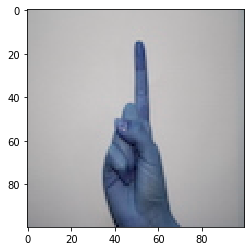

In [14]:
preimage = cv2.imread('data/Dataset/1/IMG_1119.JPG')
print(type(preimage))
print(preimage.shape)
plt.imshow(preimage)

<class 'numpy.ndarray'>
(100, 100)


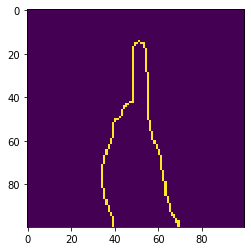

In [10]:
image = process('data/Dataset/1/IMG_1119.JPG')
print(type(image))
print(image.shape)
plt.imshow(image)

<class 'numpy.ndarray'>
(100, 100)


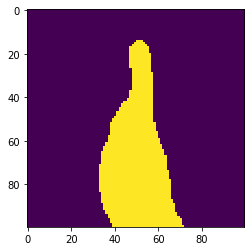

In [16]:
image2 = func('data/Dataset/1/IMG_1119.JPG')
print(type(image2))
print(image2.shape)
plt.imshow(image2)

<class 'numpy.ndarray'>
(100, 100)


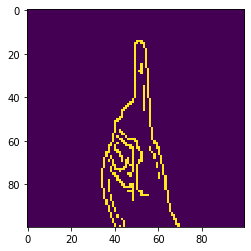

In [18]:
image3 = func3('data/Dataset/1/IMG_1119.JPG')
print(type(image3))
print(image3.shape)
plt.imshow(image3)

<class 'numpy.ndarray'>
(100, 100)


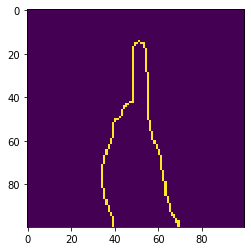

In [24]:
image4 = func6('data/Dataset/1/IMG_1119.JPG')
print(type(image4))
print(image4.shape)
plt.imshow(image4)

<class 'numpy.ndarray'>
(100, 100)


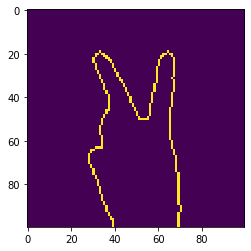

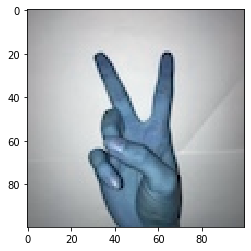

In [29]:
image = func6('data/Dataset/2/IMG_4215.JPG')
print(type(image))
print(image.shape)
plt.imshow(image)
plt.figure()
plt.imshow(cv2.imread('data/Dataset/2/IMG_4215.JPG'))

In [31]:
def img_preprocess(img_path):
    img = func5(img_path)
    img = transformer_ImageNet(img)
    return img     

In [33]:
from torchvision import transforms
transformer_ImageNet = transforms.Compose([
  #   transforms.Resize((300, 300)),
    transforms.ToTensor()
])

In [35]:
image = img_preprocess('data/Dataset/2/IMG_4215.JPG')
print(type(image))
print(image.shape)
# print(image.shape)
# plt.imshow(image)

<class 'torch.Tensor'>
torch.Size([1, 100, 100])
